In [1]:
import torch
import numpy as np
import random
import time
import os
import matplotlib.pyplot as plt
from model.lf_model import LowFidelityPINN
from model.fixed_scheme_model import FixedSchemePINN 
from model.classic_pinn_model import ClassicalPINN 
from utils.pde_utils import evaluate, get_exact_solution, train_universal
from utils.plot_utils import plot, plot_theta_field

In [2]:
def test_heat():
    """Тест уравнения теплопроводности"""
    print("\n" + "="*60)
    print("ТЕСТ: Уравнение теплопроводности")
    print("="*60)
    
    model = LowFidelityPINN('heat', n_steps=4, theta_hidden_dim=5)
    domain = {'x': (0.0, 1.0), 't': (0.0, 0.5)}
    exact_sol = get_exact_solution('heat')
    
    history = train_universal(model, domain, epochs=1000, n_collocation=100, n_bc=10, n_ic=10)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    if isinstance(results['theta_statistics'], dict):
        theta_stats = results['theta_statistics']
        print(f"\nРезультаты:")
        print(f"  θ (среднее): {theta_stats['mean']:.4f} ± {theta_stats['std']:.4f}")
        print(f"  θ (диапазон): [{theta_stats['min']:.4f}, {theta_stats['max']:.4f}]")
    
    print(f"  PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"  Средняя ошибка: {results['mean_error']:.2e}")
        print(f"  Макс. ошибка: {results['max_error']:.2e}")
    
    plot(results, history, "Heat Equation - Low-Fidelity PINN")
    plot_theta_field(model, domain, "Heat Equation")
    
    return results, history


def test_wave():
    """Тест волнового уравнения"""
    print("\n" + "="*60)
    print("ТЕСТ: Волновое уравнение")
    print("="*60)
    
    model = LowFidelityPINN('wave', n_steps=5, theta_hidden_dim=5)
    domain = {'x': (0.0, 1.0), 't': (0.0, 1.0)}
    exact_sol = get_exact_solution('wave')
    
    history = train_universal(model, domain, epochs=1000, n_collocation=100, n_bc=10, n_ic = 10)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    if isinstance(results['theta_statistics'], dict):
        theta_stats = results['theta_statistics']
        print(f"\nРезультаты:")
        print(f"  θ (среднее): {theta_stats['mean']:.4f} ± {theta_stats['std']:.4f}")
        print(f"  θ (диапазон): [{theta_stats['min']:.4f}, {theta_stats['max']:.4f}]")
    
    print(f"  PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"  Средняя ошибка: {results['mean_error']:.2e}")
        print(f"  Макс. ошибка: {results['max_error']:.2e}")
    
    plot(results, history, "Wave Equation - Low-Fidelity PINN")
    plot_theta_field(model, domain, "Wave Equation")
    
    return results, history


def test_burgers():
    """Тест уравнения Бюргерса"""
    print("\n" + "="*60)
    print("ТЕСТ: Уравнение Бюргерса")
    print("="*60)
    
    model = LowFidelityPINN('burgers', n_steps=2, theta_hidden_dim=5)
    domain = {'x': (-1.0, 1.0), 't': (0.01, 0.3)}
    exact_sol = get_exact_solution('burgers')
    
    history = train_universal(model, domain, epochs=1000, n_collocation=100, n_bc=10)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    if isinstance(results['theta_statistics'], dict):
        theta_stats = results['theta_statistics']
        print(f"\nРезультаты:")
        print(f"  θ (среднее): {theta_stats['mean']:.4f} ± {theta_stats['std']:.4f}")
        print(f"  θ (диапазон): [{theta_stats['min']:.4f}, {theta_stats['max']:.4f}]")
    
    print(f"  PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"  Средняя ошибка: {results['mean_error']:.2e}")
        print(f"  Макс. ошибка: {results['max_error']:.2e}")
    
    plot(results, history, "Burgers Equation - Low-Fidelity PINN")
    plot_theta_field(model, domain, "Burgers Equation")
    
    return results, history


def test_reaction_diffusion():
    """Тест уравнения реакции-диффузии"""
    print("\n" + "="*60)
    print("ТЕСТ: Уравнение реакции-диффузии")
    print("="*60)
    
    model = LowFidelityPINN('reaction_diffusion', n_steps=2, theta_hidden_dim=5)
    domain = {'x': (-1.0, 3.0), 't': (0.0, 1.0)}
    exact_sol = get_exact_solution('reaction_diffusion')
    
    history = train_universal(model, domain, epochs=1000, n_collocation=100, n_bc=10)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    if isinstance(results['theta_statistics'], dict):
        theta_stats = results['theta_statistics']
        print(f"\nРезультаты:")
        print(f"  θ (среднее): {theta_stats['mean']:.4f} ± {theta_stats['std']:.4f}")
        print(f"  θ (диапазон): [{theta_stats['min']:.4f}, {theta_stats['max']:.4f}]")
    
    print(f"  PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"  Средняя ошибка: {results['mean_error']:.2e}")
        print(f"  Макс. ошибка: {results['max_error']:.2e}")
    
    plot(results, history, "Reaction-Diffusion - Low-Fidelity PINN")
    plot_theta_field(model, domain, "Reaction-Diffusion")
    
    return results, history


def run_all_tests():
    """Запуск всех тестов"""
    print("\n" + "="*60)
    print("ЗАПУСК ВСЕХ ТЕСТОВ Low-Fidelity PINN")
    print("="*60)
    
    tests = [
        ('heat', test_heat),
        ('wave', test_wave),
        ('burgers', test_burgers),
        ('reaction_diffusion', test_reaction_diffusion),
    ]
    
    results_dict = {}
    
    for name, test_func in tests:
        try:
            print(f"\n{'='*60}")
            print(f"Запуск теста: {name.upper()}")
            print(f"{'='*60}")
            results, history = test_func()
            results_dict[name] = {'results': results, 'history': history}
        except Exception as e:
            print(f"\n❌ ОШИБКА в тесте {name}: {e}")
            import traceback
            traceback.print_exc()
            results_dict[name] = None
    
    # Итоговая таблица
    print("\n" + "="*60)
    print("ИТОГОВАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
    print("="*60)
    print(f"{'PDE':<20} {'Mean Error':<15} {'Max Error':<15} {'PDE Residual':<15} {'θ mean':<10}")
    print("-"*75)
    
    for name, data in results_dict.items():
        if data is None:
            print(f"{name:<20} {'FAILED':<15} {'FAILED':<15} {'FAILED':<15} {'FAILED':<10}")
        elif data['results'] is None:
            print(f"{name:<20} {'SKIPPED':<15} {'SKIPPED':<15} {'SKIPPED':<15} {'SKIPPED':<10}")
        else:
            res = data['results']
            mean_err = res.get('mean_error', 'N/A')
            max_err = res.get('max_error', 'N/A')
            pde_res = res.get('pde_residual', 'N/A')
            theta = res.get('theta_statistics', {})
            theta_mean = theta.get('mean', 'N/A') if isinstance(theta, dict) else 'N/A'
            
            mean_err_str = f"{mean_err:.2e}" if isinstance(mean_err, float) else str(mean_err)
            max_err_str = f"{max_err:.2e}" if isinstance(max_err, float) else str(max_err)
            pde_res_str = f"{pde_res:.2e}" if isinstance(pde_res, float) else str(pde_res)
            theta_str = f"{theta_mean:.3f}" if isinstance(theta_mean, float) else str(theta_mean)
            
            print(f"{name:<20} {mean_err_str:<15} {max_err_str:<15} {pde_res_str:<15} {theta_str:<10}")
    
    print("="*75)
    return results_dict


ЗАПУСК ВСЕХ ТЕСТОВ Low-Fidelity PINN

Запуск теста: HEAT

ТЕСТ: Уравнение теплопроводности

Low-Fidelity PINN
PDE: heat | Steps: 4 | Params: 26

   Epoch    0: Loss=8.34e-02, PDE=8.34e-02, BC=7.84e-16, IC=0.00e+00, θ=0.499±0.000
   Epoch  100: Loss=1.48e-02, PDE=1.48e-02, BC=1.55e-16, IC=0.00e+00, θ=0.431±0.005
   Epoch  200: Loss=5.08e-03, PDE=5.08e-03, BC=7.56e-16, IC=0.00e+00, θ=0.395±0.008
   Epoch  300: Loss=4.38e-03, PDE=4.38e-03, BC=6.89e-16, IC=0.00e+00, θ=0.384±0.008
   Epoch  400: Loss=4.10e-03, PDE=4.10e-03, BC=1.09e-15, IC=0.00e+00, θ=0.382±0.009
   Epoch  500: Loss=3.57e-03, PDE=3.57e-03, BC=6.07e-17, IC=0.00e+00, θ=0.378±0.010
   Epoch  600: Loss=3.84e-03, PDE=3.84e-03, BC=1.00e-15, IC=0.00e+00, θ=0.379±0.009
   Epoch  700: Loss=3.48e-03, PDE=3.48e-03, BC=1.01e-15, IC=0.00e+00, θ=0.378±0.010
   Epoch  800: Loss=2.85e-03, PDE=2.85e-03, BC=1.09e-15, IC=0.00e+00, θ=0.377±0.011
   Epoch  900: Loss=3.53e-03, PDE=3.53e-03, BC=8.69e-16, IC=0.00e+00, θ=0.376±0.012

Результаты:
 

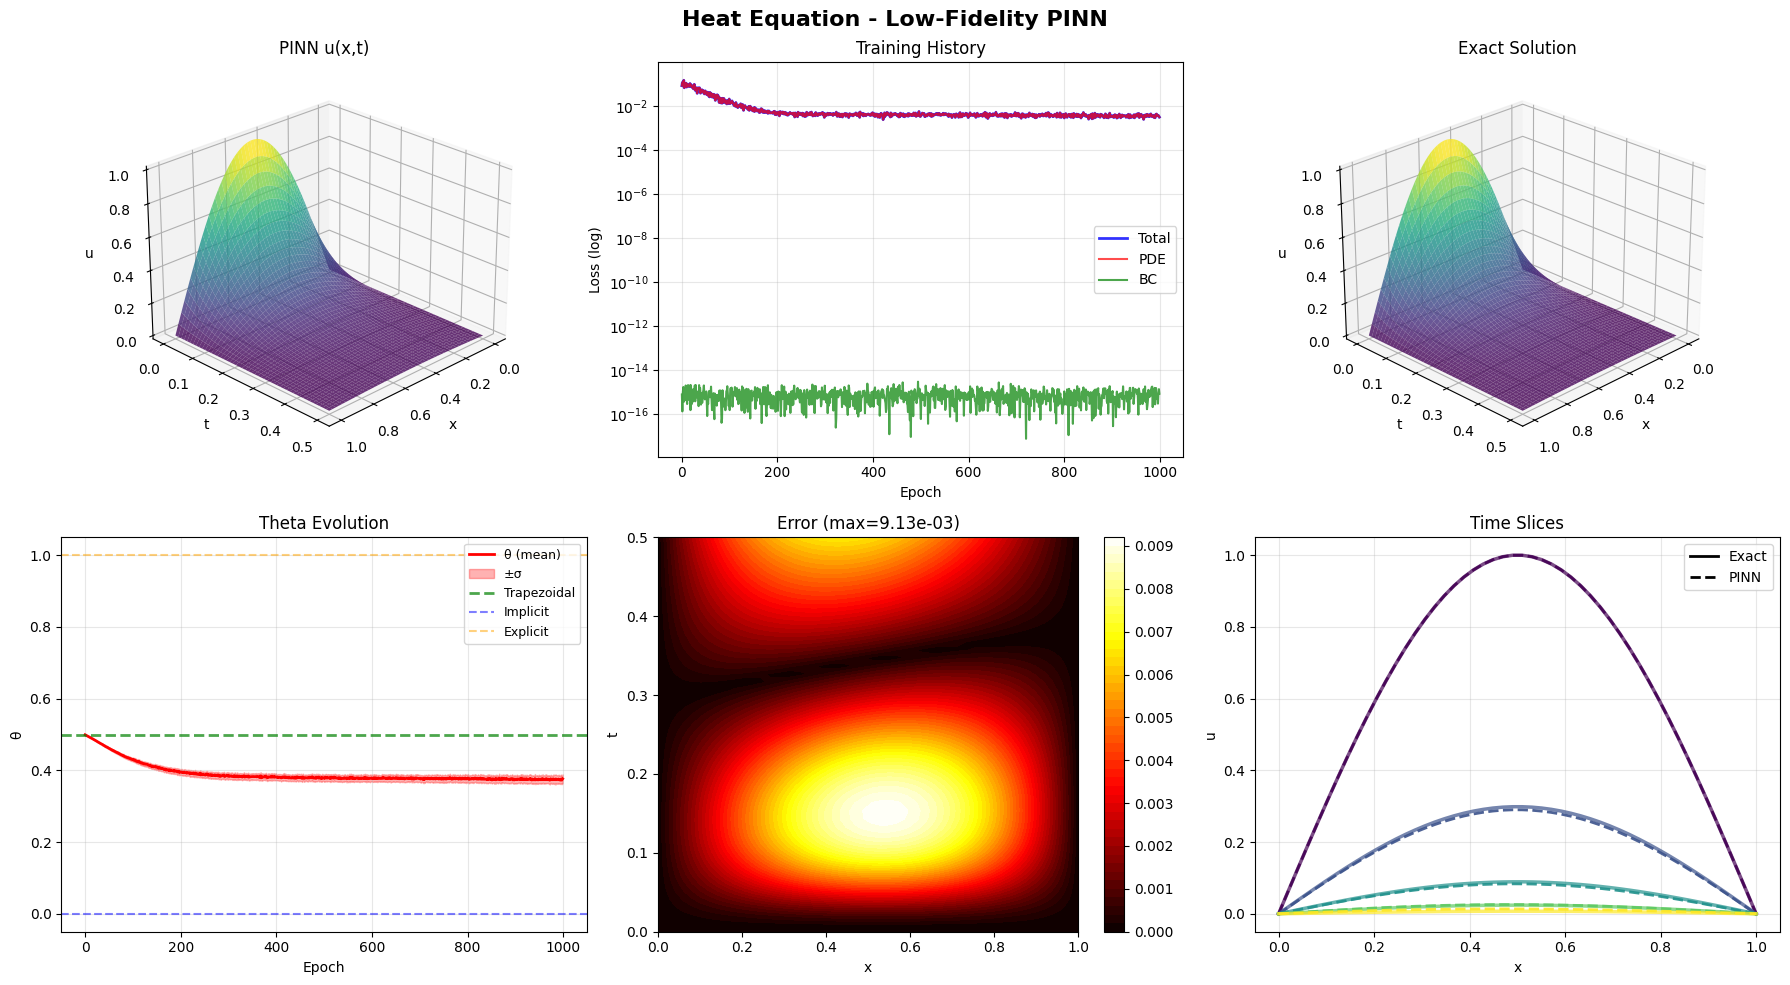


Final Parameters:
  n_steps              = 4.000000
  alpha                = 1.000000
Final Loss: 3.1124e-03
Mean Error: 2.9216e-03
Max Error:  9.1333e-03



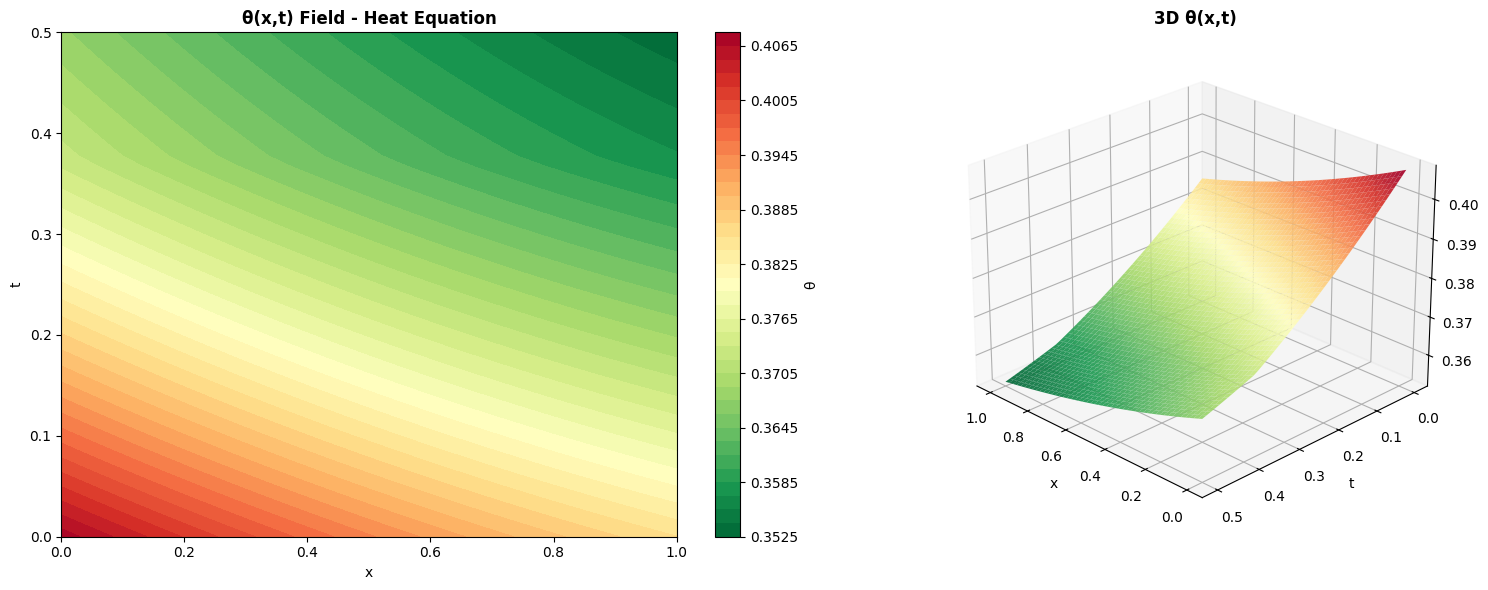


θ Statistics: mean=0.3743, std=0.0121, min=0.3530, max=0.4074

Запуск теста: WAVE

ТЕСТ: Волновое уравнение

Low-Fidelity PINN
PDE: wave | Steps: 5 | Params: 26

   Epoch    0: Loss=4.61e-01, PDE=4.61e-01, BC=4.65e-15, IC=0.00e+00, θ=0.499±0.000
   Epoch  100: Loss=3.21e-01, PDE=3.21e-01, BC=4.25e-15, IC=0.00e+00, θ=0.474±0.007
   Epoch  200: Loss=3.00e-01, PDE=3.00e-01, BC=4.82e-15, IC=0.00e+00, θ=0.471±0.015
   Epoch  300: Loss=4.60e-01, PDE=4.60e-01, BC=5.00e-15, IC=0.00e+00, θ=0.463±0.022
   Epoch  400: Loss=3.07e-01, PDE=3.07e-01, BC=2.84e-15, IC=0.00e+00, θ=0.451±0.039
   Epoch  500: Loss=1.57e-01, PDE=1.57e-01, BC=5.46e-15, IC=0.00e+00, θ=0.439±0.061
   Epoch  600: Loss=1.80e-01, PDE=1.80e-01, BC=3.30e-15, IC=0.00e+00, θ=0.423±0.081
   Epoch  700: Loss=1.17e-01, PDE=1.17e-01, BC=4.92e-15, IC=0.00e+00, θ=0.397±0.108
   Epoch  800: Loss=1.25e-01, PDE=1.25e-01, BC=4.65e-15, IC=0.00e+00, θ=0.381±0.128
   Epoch  900: Loss=1.09e-01, PDE=1.09e-01, BC=2.71e-15, IC=0.00e+00, θ=0.401±0.1

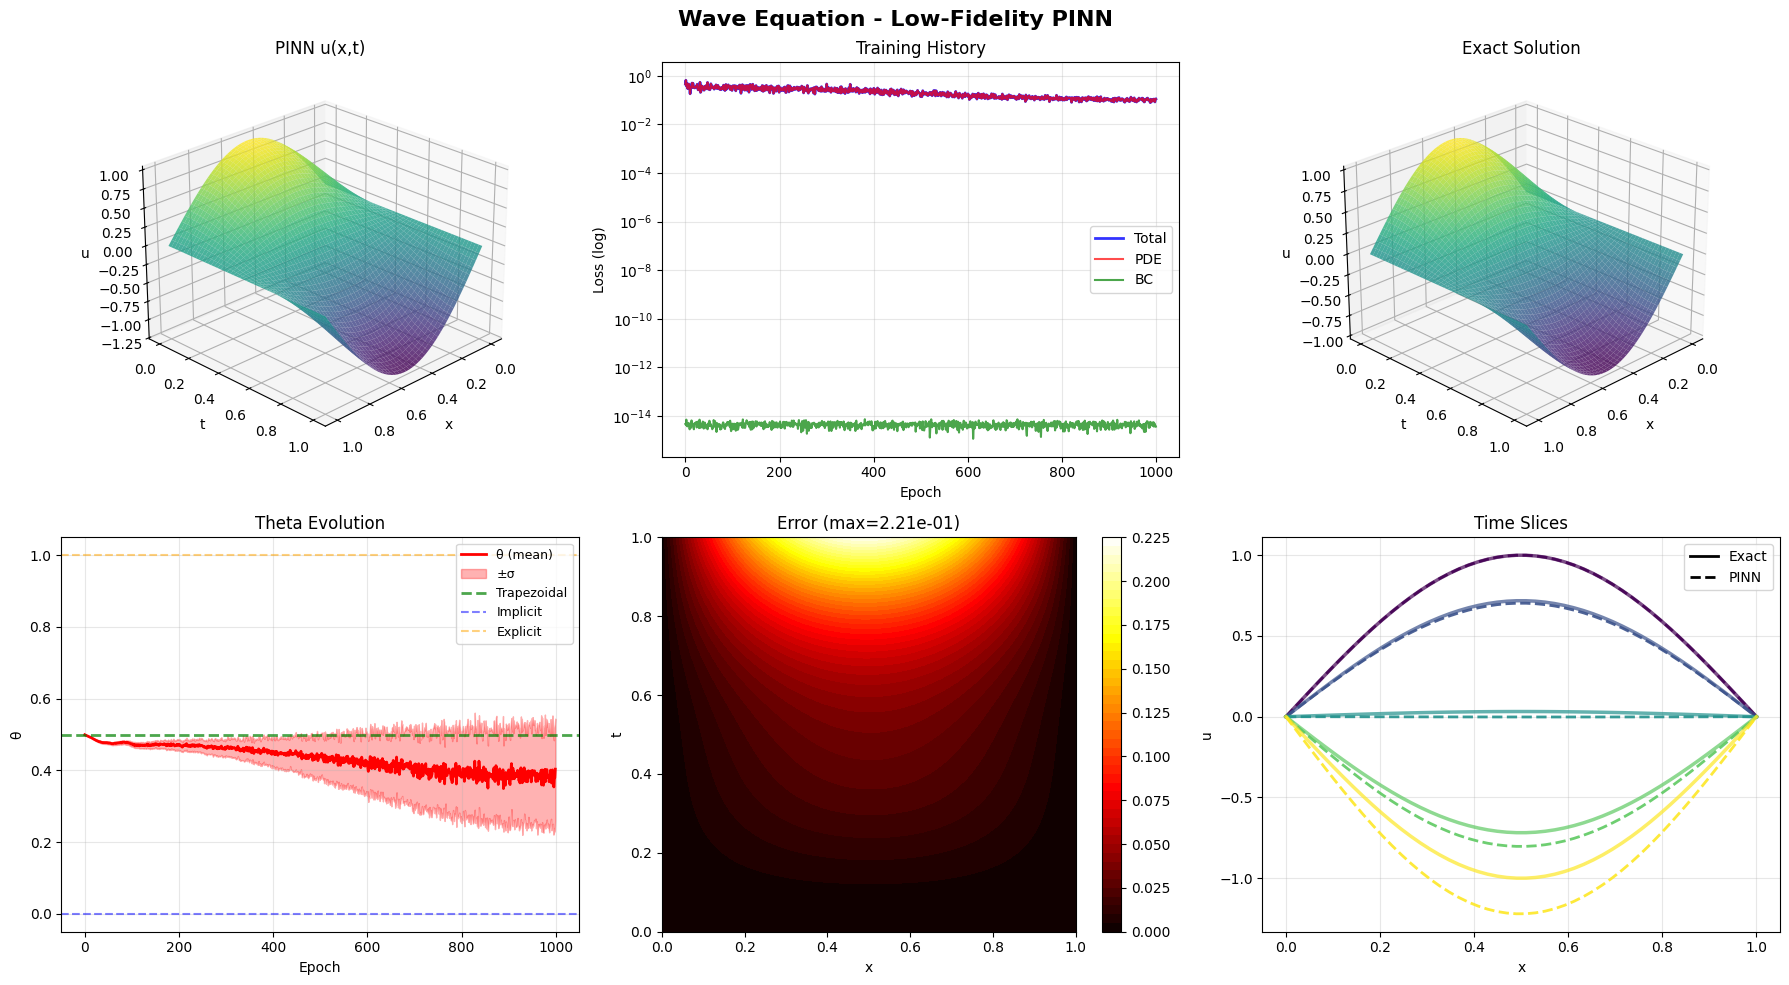


Final Parameters:
  n_steps              = 5.000000
  c                    = 1.000000
Final Loss: 1.1093e-01
Mean Error: 3.6446e-02
Max Error:  2.2063e-01



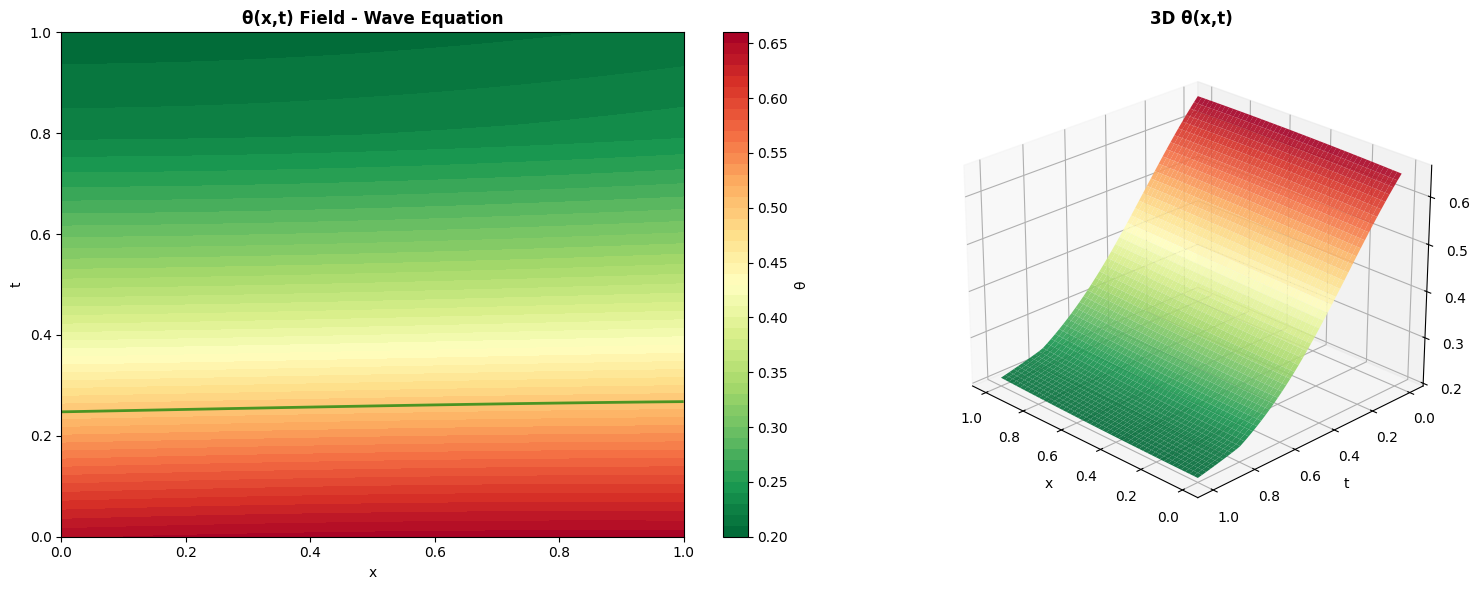


θ Statistics: mean=0.3822, std=0.1444, min=0.2035, max=0.6560

Запуск теста: BURGERS

ТЕСТ: Уравнение Бюргерса

Low-Fidelity PINN
PDE: burgers | Steps: 2 | Params: 26

   Epoch    0: Loss=1.02e-01, PDE=1.02e-01, BC=1.53e-14, IC=0.00e+00, θ=0.500±0.000
   Epoch  100: Loss=2.45e-01, PDE=2.45e-01, BC=1.90e-14, IC=0.00e+00, θ=0.448±0.007
   Epoch  200: Loss=1.00e-01, PDE=1.00e-01, BC=1.07e-14, IC=0.00e+00, θ=0.392±0.011
   Epoch  300: Loss=4.15e-02, PDE=4.15e-02, BC=1.45e-14, IC=0.00e+00, θ=0.356±0.014
   Epoch  400: Loss=1.62e-01, PDE=1.62e-01, BC=1.94e-14, IC=0.00e+00, θ=0.345±0.012
   Epoch  500: Loss=7.99e-02, PDE=7.99e-02, BC=1.74e-14, IC=0.00e+00, θ=0.345±0.009
   Epoch  600: Loss=1.30e-01, PDE=1.30e-01, BC=1.51e-14, IC=0.00e+00, θ=0.343±0.009
   Epoch  700: Loss=5.80e-02, PDE=5.80e-02, BC=1.42e-14, IC=0.00e+00, θ=0.333±0.009
   Epoch  800: Loss=9.09e-02, PDE=9.09e-02, BC=1.45e-14, IC=0.00e+00, θ=0.328±0.008
   Epoch  900: Loss=1.19e-01, PDE=1.19e-01, BC=1.17e-14, IC=0.00e+00, θ=0.3

/Users/igor.velikorechanin/Desktop/Masters/Thesis/Trapezioid Architecture PINN/utils/pde_utils.py:204: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  num, _ = quad(num_int, -10, 10, limit=100)
/Users/igor.velikorechanin/Desktop/Masters/Thesis/Trapezioid Architecture PINN/utils/pde_utils.py:204: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  num, _ = quad(num_int, -10, 10, limit=100)
/Users/igor.velikorechanin/Desktop/Masters/Thesis/Trapezioid Architecture PINN/utils/pde_utils.py:205: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  den, _ = quad(den_int, -10, 10, limit=100)



Результаты:
  θ (среднее): 0.3312 ± 0.0082
  θ (диапазон): [0.3184, 0.3509]
  PDE остаток: 2.28e-01
  Средняя ошибка: 2.11e-02
  Макс. ошибка: 1.57e-01


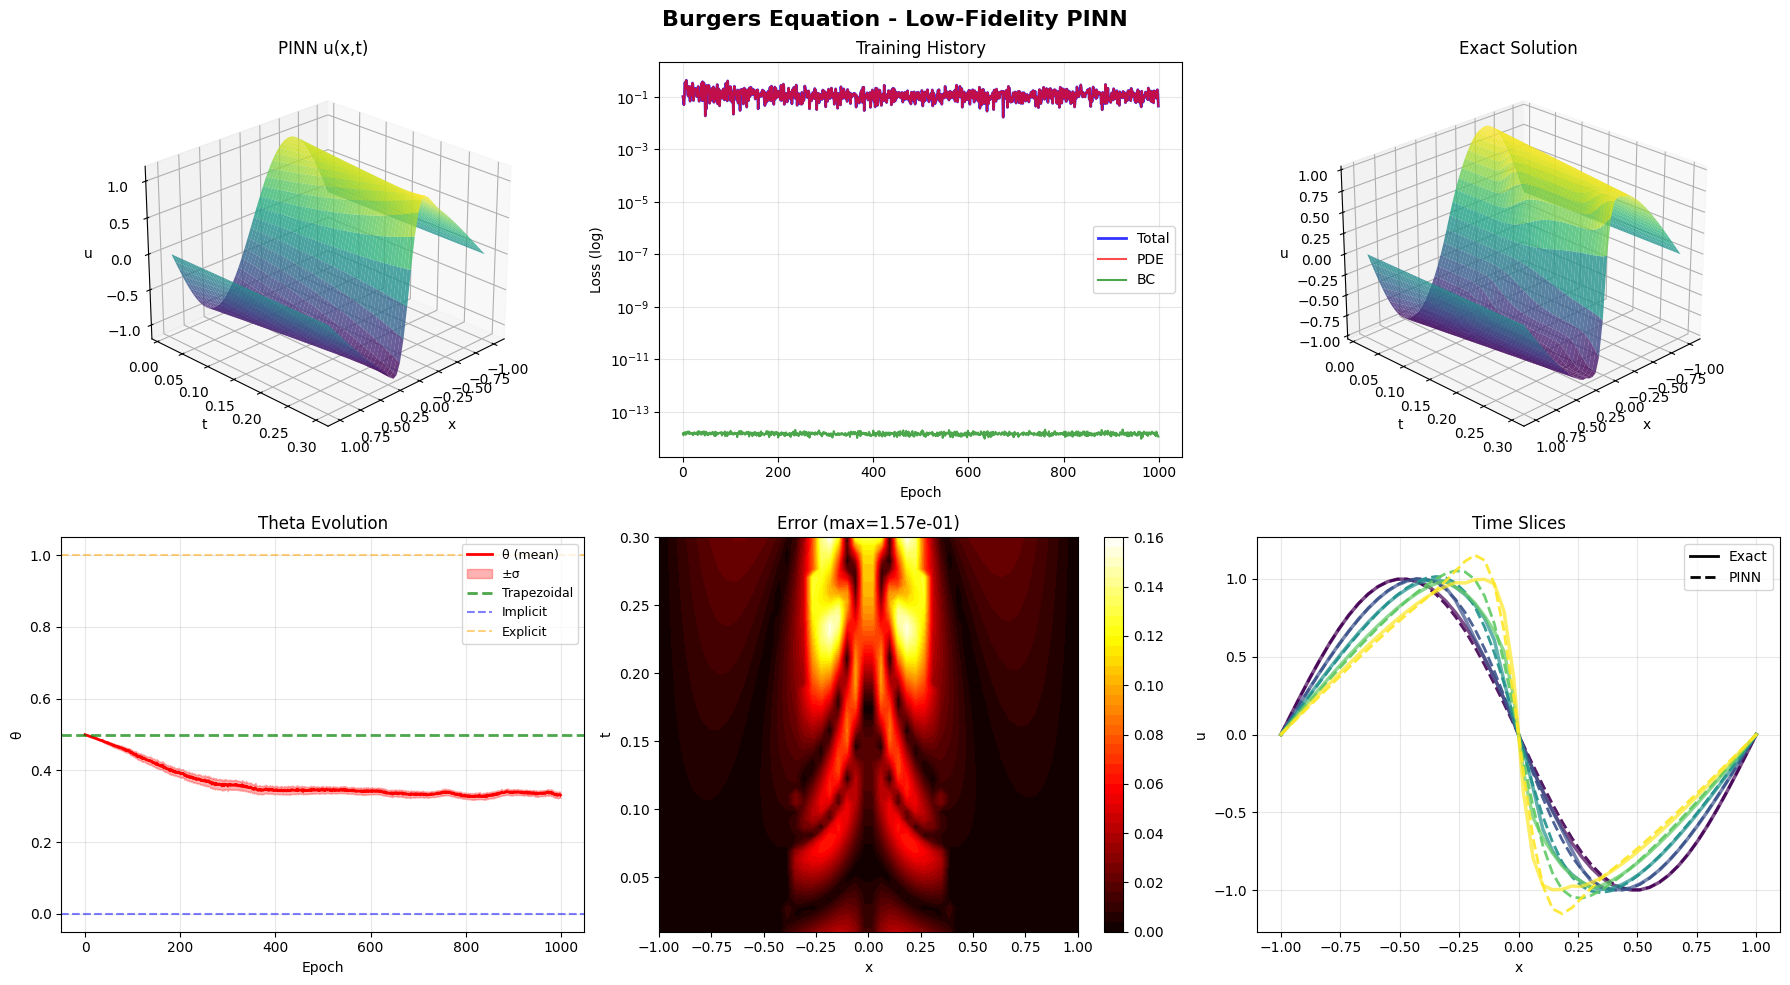


Final Parameters:
  n_steps              = 2.000000
  nu                   = 0.003183
Final Loss: 4.4721e-02
Mean Error: 2.1072e-02
Max Error:  1.5720e-01



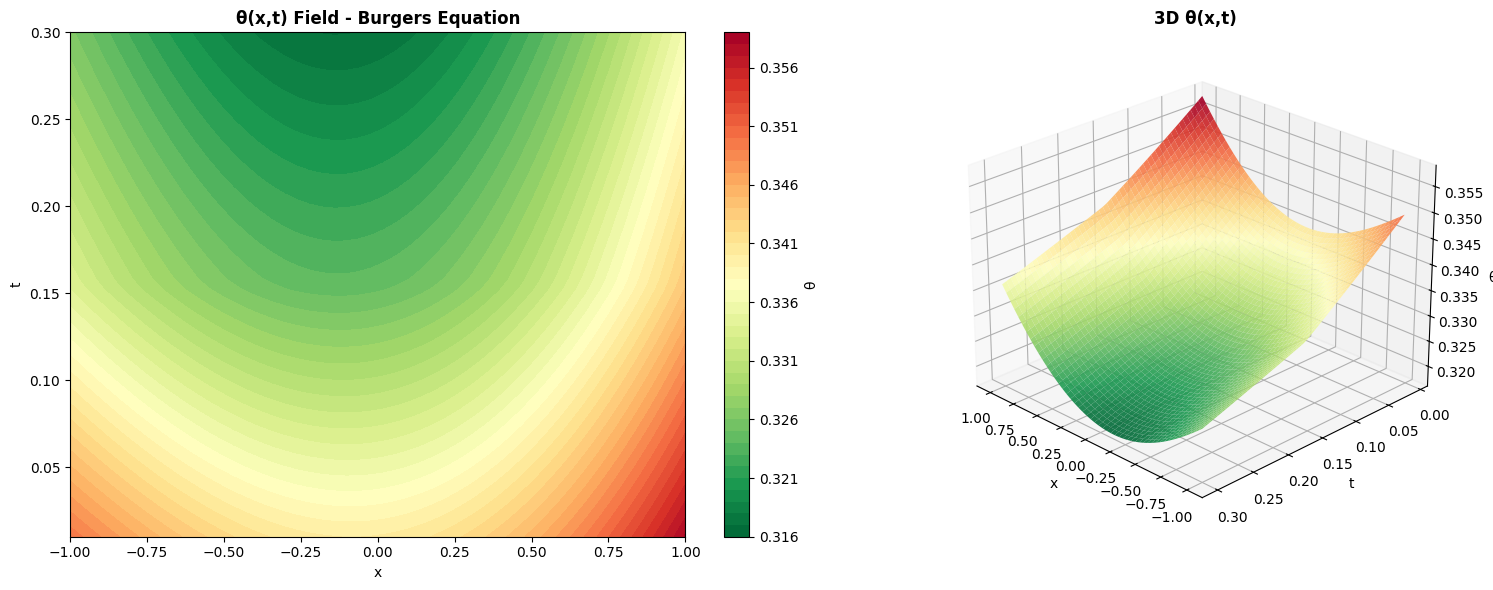


θ Statistics: mean=0.3316, std=0.0085, min=0.3169, max=0.3582

Запуск теста: REACTION_DIFFUSION

ТЕСТ: Уравнение реакции-диффузии

Low-Fidelity PINN
PDE: reaction_diffusion | Steps: 2 | Params: 26

   Epoch    0: Loss=1.84e-01, PDE=1.84e-01, BC=1.89e-11, IC=0.00e+00, θ=0.499±0.000
   Epoch  100: Loss=7.93e-03, PDE=7.93e-03, BC=8.89e-12, IC=0.00e+00, θ=0.435±0.007
   Epoch  200: Loss=1.06e-01, PDE=1.06e-01, BC=1.79e-11, IC=0.00e+00, θ=0.366±0.013
   Epoch  300: Loss=1.02e-02, PDE=1.02e-02, BC=1.87e-11, IC=0.00e+00, θ=0.306±0.020
   Epoch  400: Loss=1.94e-02, PDE=1.94e-02, BC=9.12e-12, IC=0.00e+00, θ=0.272±0.021
   Epoch  500: Loss=8.78e-03, PDE=8.78e-03, BC=1.67e-11, IC=0.00e+00, θ=0.245±0.021
   Epoch  600: Loss=3.87e-03, PDE=3.87e-03, BC=2.11e-11, IC=0.00e+00, θ=0.228±0.023
   Epoch  700: Loss=4.51e-05, PDE=4.51e-05, BC=8.43e-12, IC=0.00e+00, θ=0.216±0.022
   Epoch  800: Loss=1.65e-04, PDE=1.65e-04, BC=1.02e-11, IC=0.00e+00, θ=0.206±0.023
   Epoch  900: Loss=1.99e-04, PDE=1.99e-04, B

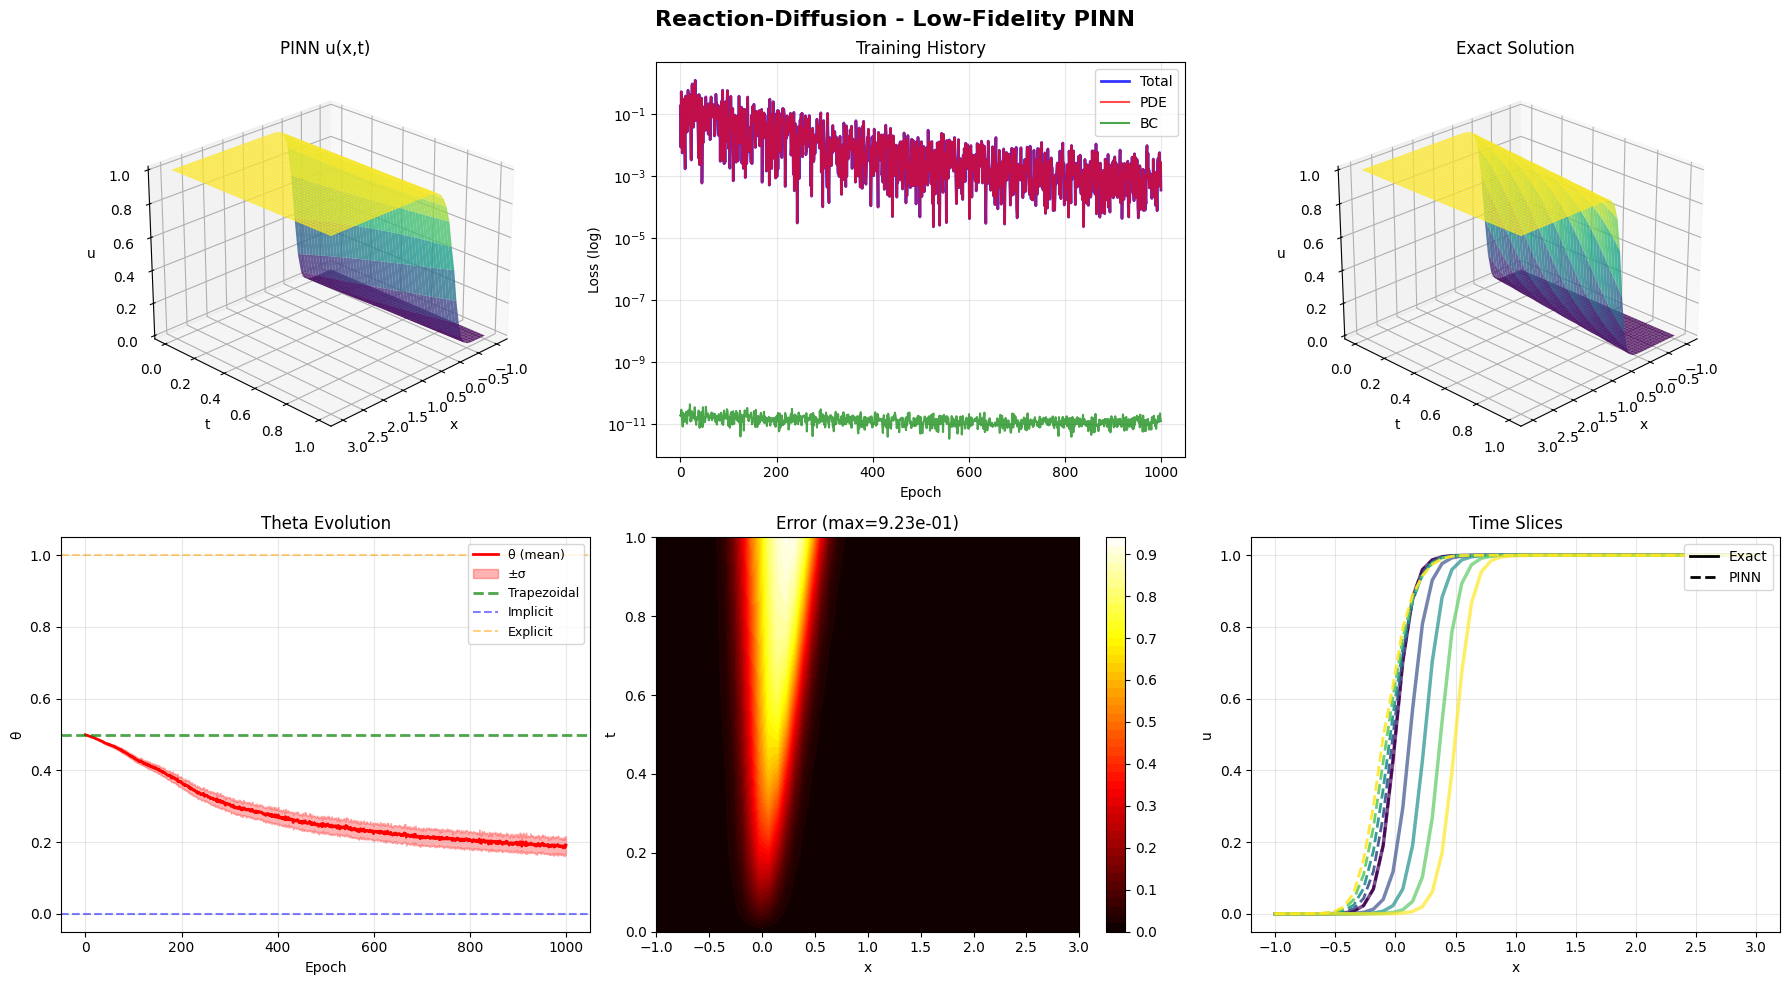


Final Parameters:
  n_steps              = 2.000000
  D                    = 0.010000
  r                    = 1.000000
Final Loss: 3.5810e-04
Mean Error: 7.1011e-02
Max Error:  9.2281e-01



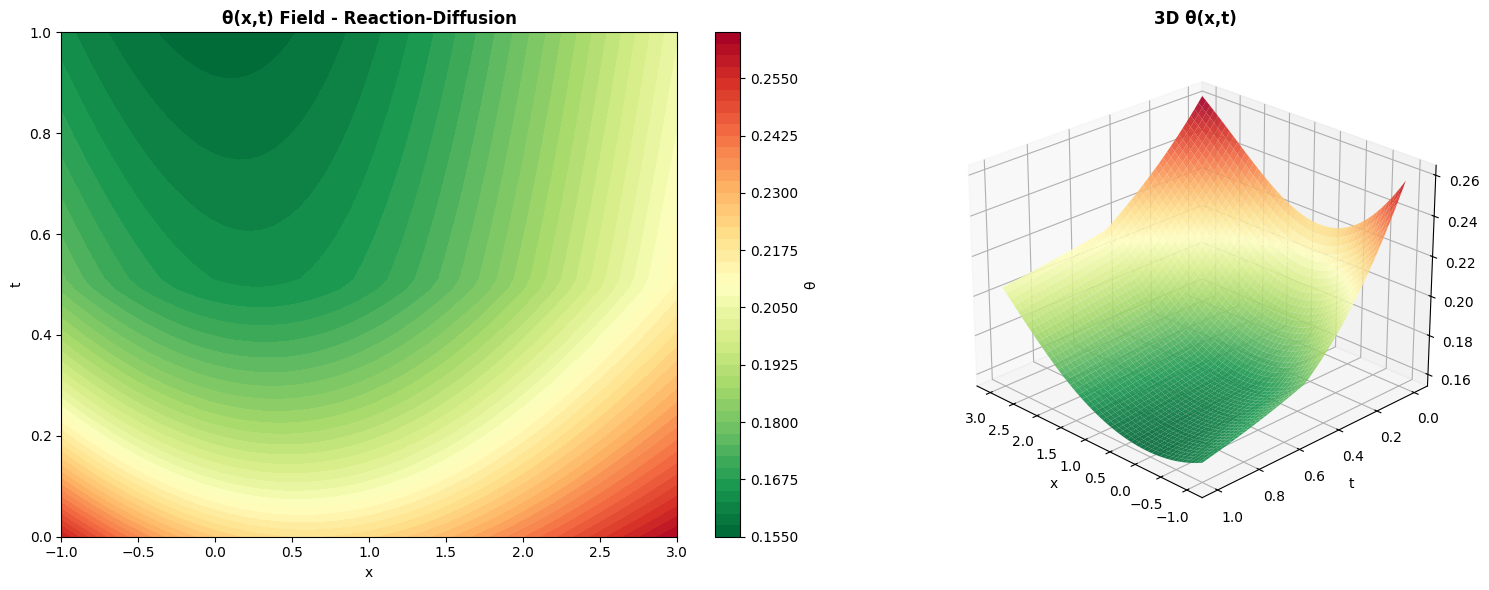


θ Statistics: mean=0.1884, std=0.0239, min=0.1562, max=0.2626

ИТОГОВАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
PDE                  Mean Error      Max Error       PDE Residual    θ mean    
---------------------------------------------------------------------------
heat                 2.92e-03        9.13e-03        3.52e-03        0.374     
wave                 3.64e-02        2.21e-01        1.01e-01        0.375     
burgers              2.11e-02        1.57e-01        2.28e-01        0.331     
reaction_diffusion   7.10e-02        9.23e-01        2.17e-04        0.185     


{'heat': {'results': {'points': tensor([[0.0000, 0.0000],
           [0.0000, 0.0102],
           [0.0000, 0.0204],
           ...,
           [1.0000, 0.4796],
           [1.0000, 0.4898],
           [1.0000, 0.5000]]),
   'u_pred': tensor([[ 0.0000e+00],
           [ 0.0000e+00],
           [ 0.0000e+00],
           ...,
           [-1.1181e-09],
           [-1.0744e-09],
           [-1.0374e-09]]),
   'grid_shape': (50, 50),
   'pde_type': 'heat',
   'pde_residual': 0.0035168349277228117,
   'theta_statistics': {'mean': 0.37366577982902527,
    'std': 0.011525552719831467,
    'min': 0.3547593951225281,
    'max': 0.3998429477214813},
   'is_spatial_2d': False,
   'model_type': 'LowFidelityPINN',
   'u_exact': tensor([[ 0.0000e+00],
           [ 0.0000e+00],
           [ 0.0000e+00],
           ...,
           [-7.6903e-10],
           [-6.9535e-10],
           [-6.2873e-10]]),
   'error': tensor([[0.0000e+00],
           [0.0000e+00],
           [0.0000e+00],
           ...,
      

In [3]:
run_all_tests()